In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns   

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


In [2]:
df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='Windows-1252')
df.head()



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
import chardet

file_path = '/kaggle/input/sample-sales-data/sales_data_sample.csv'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(100000))  # check first 100KB
print(result)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [4]:
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [5]:
df.rename(columns={
    'ORDERNUMBER': 'order_number',
    'QUANTITYORDERED': 'quantity_ordered',
    'PRICEEACH': 'price_each',
    'ORDERLINENUMBER': 'order_line_number',
    'SALES': 'sales',
    'ORDERDATE': 'order_date',
    'STATUS': 'status',
    'QTR_ID': 'qtr_id',
    'MONTH_ID': 'month_id',
    'YEAR_ID': 'year_id',
    'PRODUCTCODE': 'product_code',
    'MSRP': 'msrp',
    'PRODUCTLINE': 'product_line',
    'PRODUCTSCALE': 'product_scale',
    'PRODUCTVENDOR': 'product_vendor',
    'PRODUCTDESCRIPTION': 'product_description',
    'ADDRESSLINE1': 'address_line1',
    'ADDRESSLINE2': 'address_line2',
    'CITY': 'city',
    'STATE': 'state',
    'POSTALCODE': 'postal_code',
    'COUNTRY': 'country',
    'TERRITORY': 'territory',
    'CONTACTLASTNAME': 'contact_last_name',
    'CONTACTFIRSTNAME': 'contact_first_name',
    'DEALSIZE': 'deal_size'
}, inplace=True)


In [6]:
df.head()

,order_number,quantity_ordered,price_each,order_line_number,sales,order_date,status,qtr_id,month_id,year_id,...,address_line1,address_line2,city,state,postal_code,country,territory,contact_last_name,contact_first_name,deal_size
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df.head()

,order_number,quantity_ordered,price_each,order_line_number,sales,order_date,status,qtr_id,month_id,year_id,...,address_line1,address_line2,city,state,postal_code,country,territory,contact_last_name,contact_first_name,deal_size
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


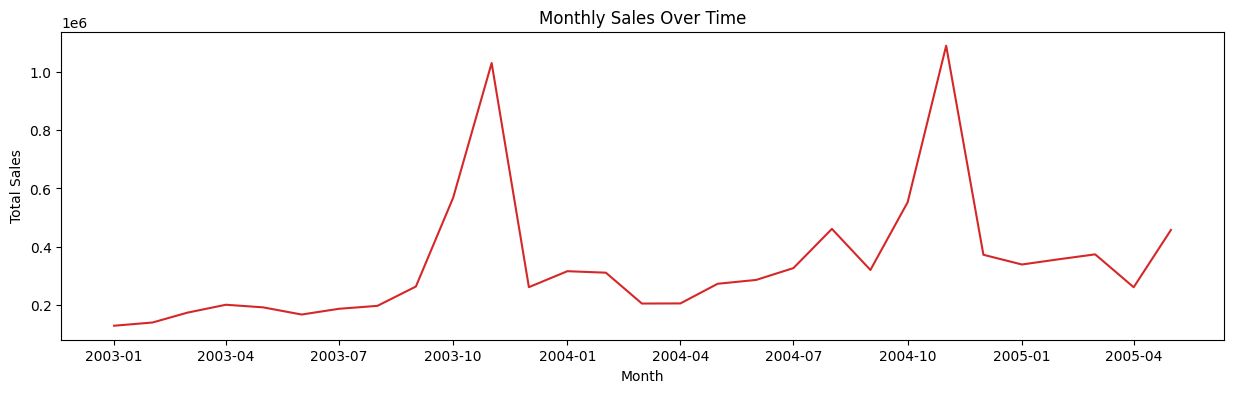

In [8]:
# Make sure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Aggregate sales by month
monthly_sales = (
    df.groupby(df['order_date'].dt.to_period('M'))['sales']
      .sum()
      .reset_index()
)
# Convert period back to datetime for plotting
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

# Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(
    monthly_sales,
    x=monthly_sales['order_date'],
    y=monthly_sales['sales'],
    title='Monthly Sales Over Time',
    xlabel='Month',
    ylabel='Total Sales'
)


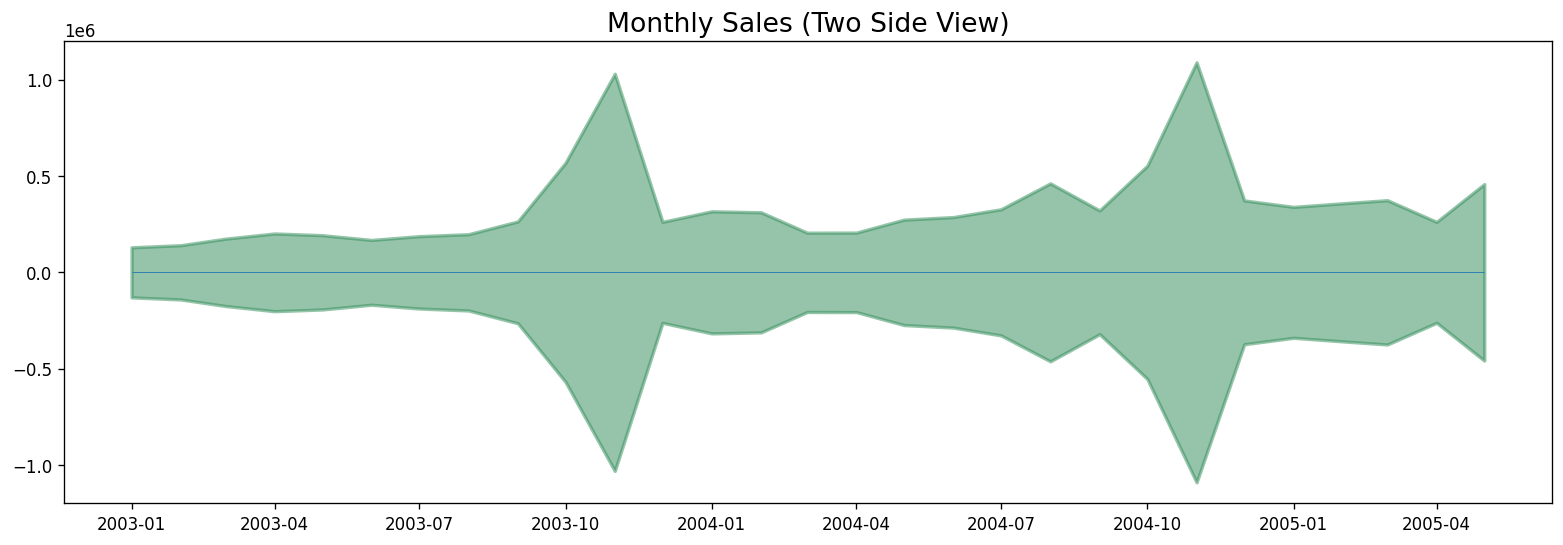

In [9]:
#  Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

#  Aggregate sales by month
monthly_sales = (
    df.groupby(df['order_date'].dt.to_period('M'))['sales']
      .sum()
      .reset_index()
)
# Convert period to timestamp for plotting
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

#  Prepare x and y values
x = monthly_sales['order_date'].values
y1 = monthly_sales['sales'].values

#  Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-max(y1)*1.1, max(y1)*1.1)  # scale symmetrically
plt.title('Monthly Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()


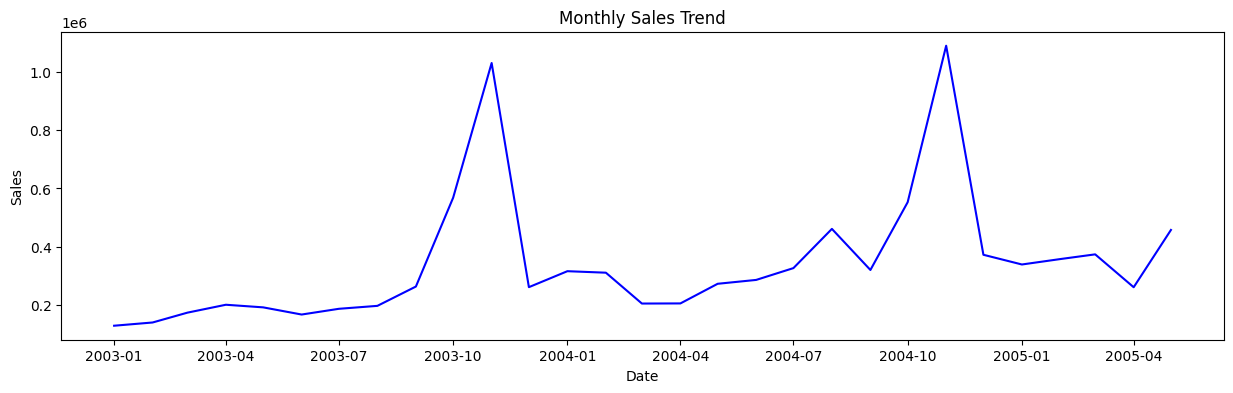

In [10]:
# First, make sure we have monthly aggregated sales
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

monthly_sales = (
    df.groupby(df['order_date'].dt.to_period('M'))['sales']
      .sum()
      .reset_index()
)
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Sales', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# Plot monthly sales trend
plot_df(
    monthly_sales,
    x=monthly_sales['order_date'],
    y=monthly_sales['sales'],
    title='Monthly Sales Trend'
)


/tmp/ipykernel_13/714616712.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_13/714616712.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


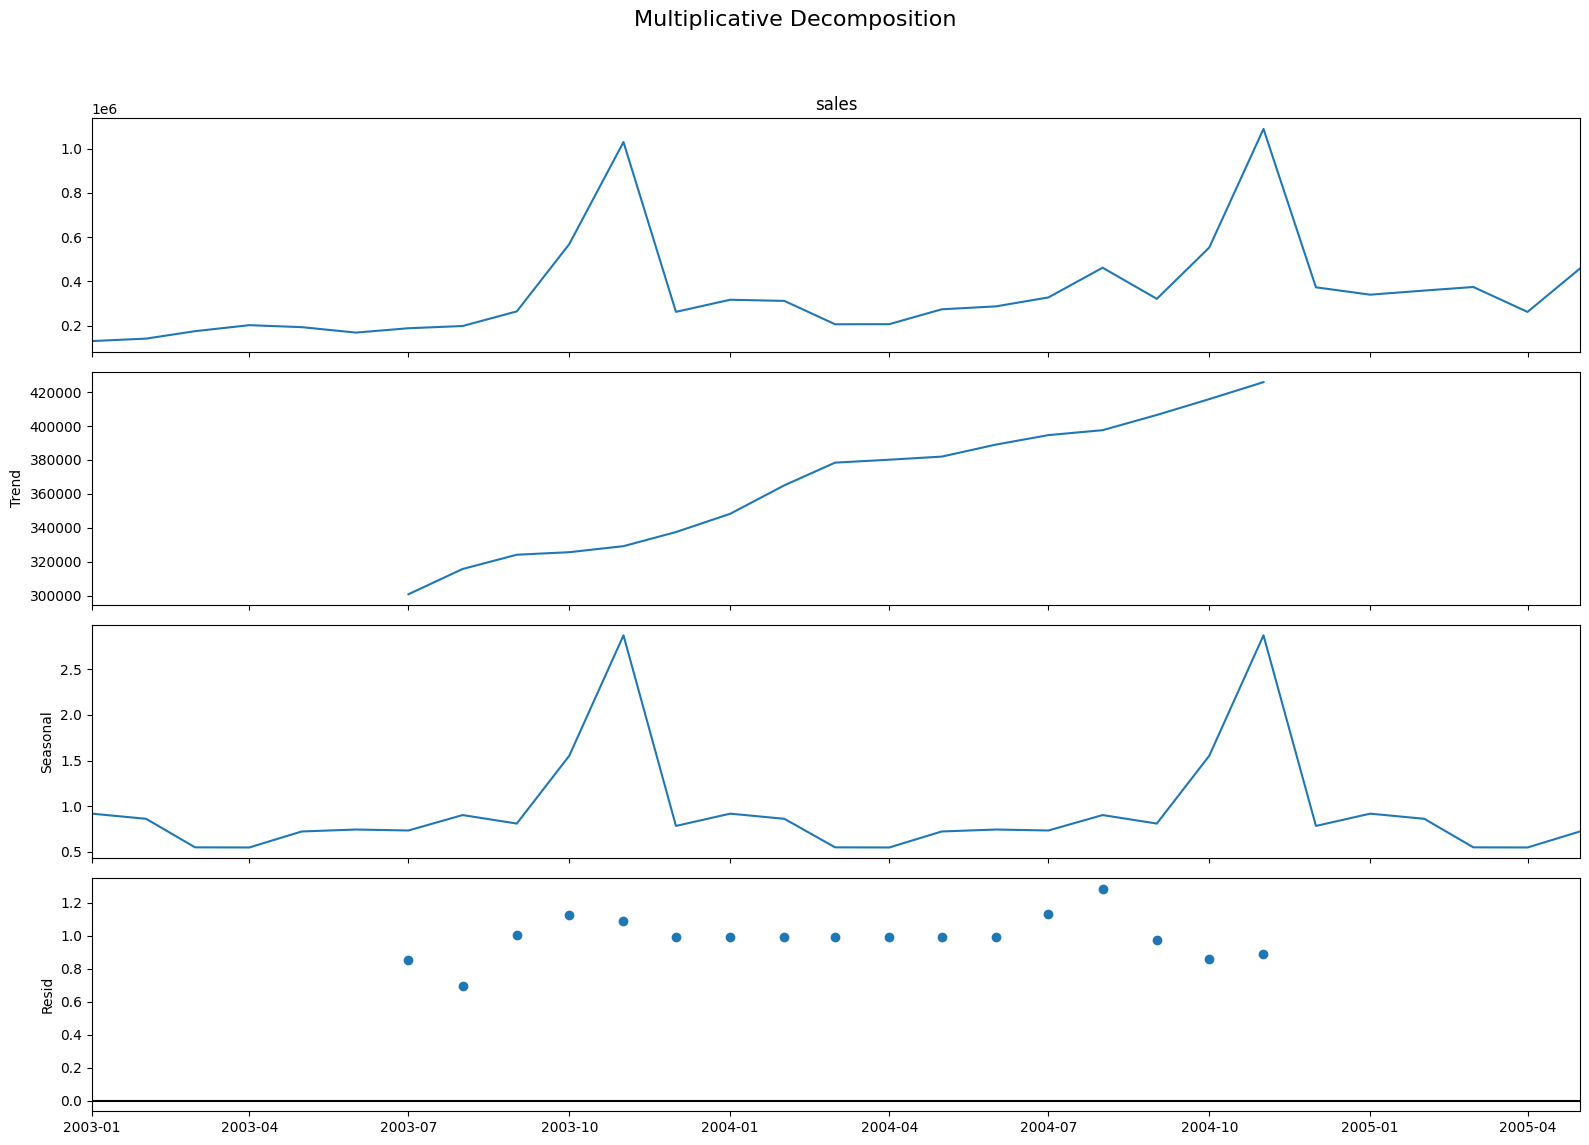

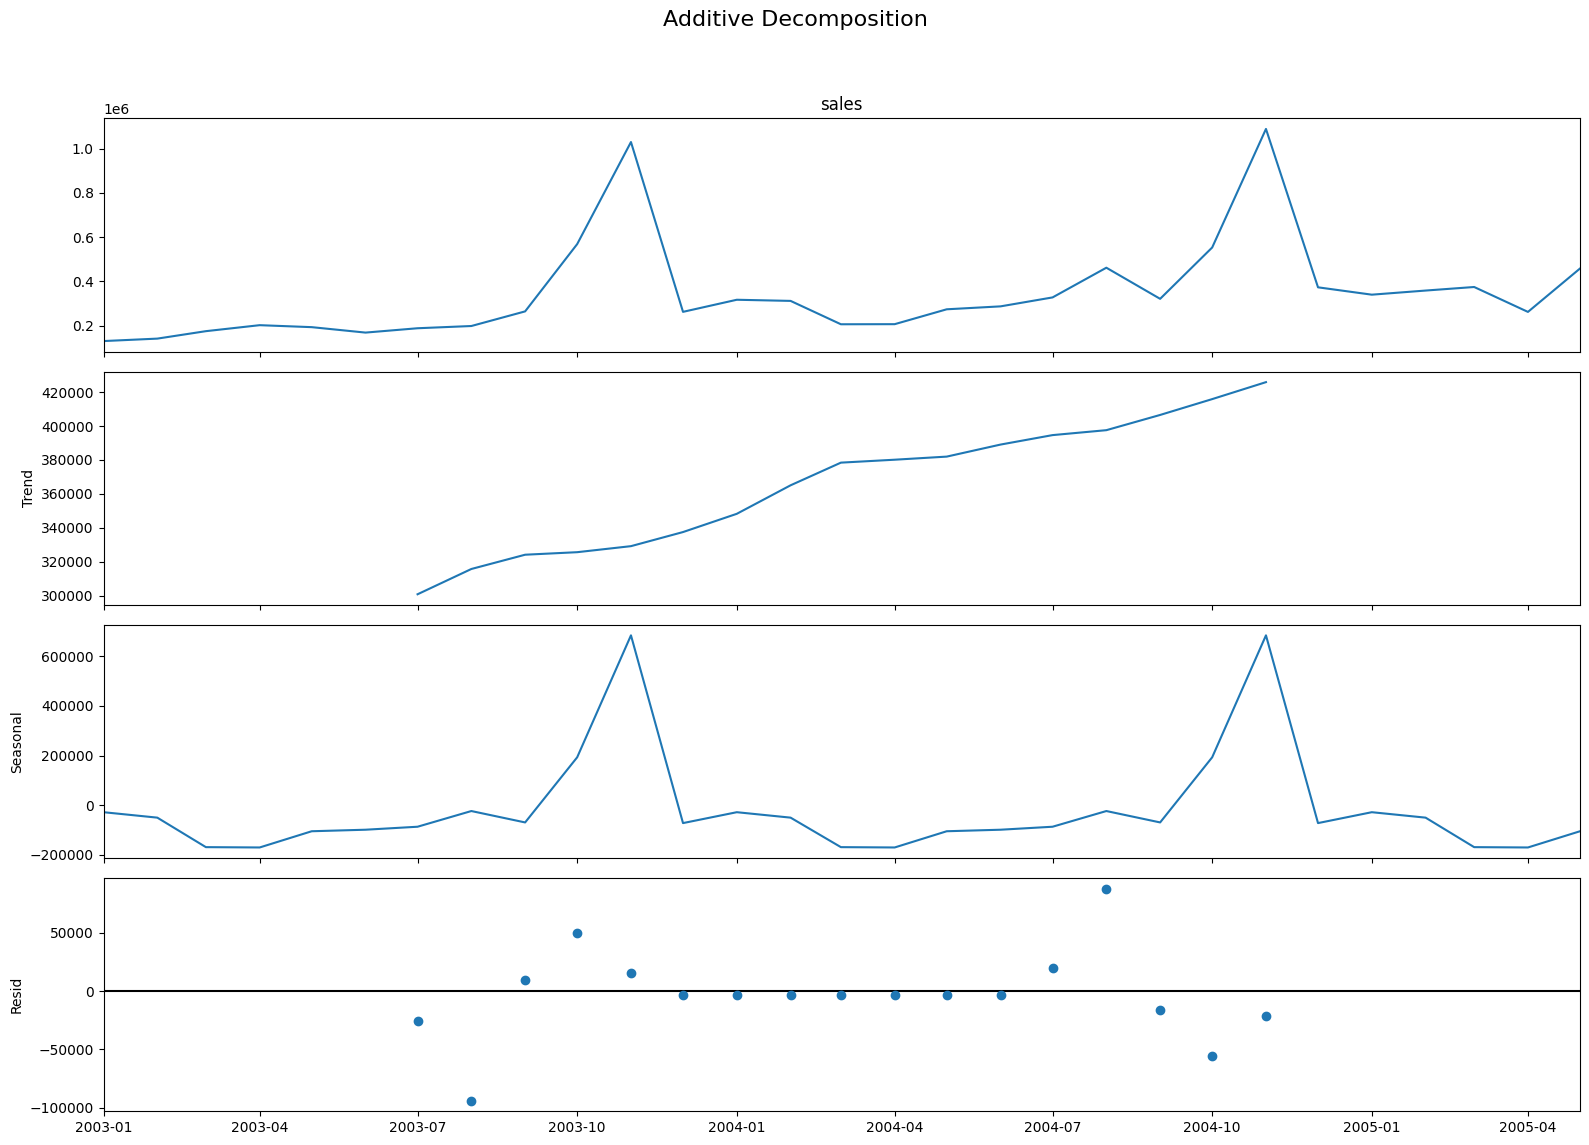

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Aggregate monthly sales
monthly_sales = (
    df.groupby(df['order_date'].dt.to_period('M'))['sales']
      .sum()
      .reset_index()
)
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

#  Set date as index for decomposition
monthly_sales.set_index('order_date', inplace=True)

# Multiplicative decomposition
multiplicative_decomposition = seasonal_decompose(monthly_sales['sales'], model='multiplicative', period=12)

# Additive decomposition
additive_decomposition = seasonal_decompose(monthly_sales['sales'], model='additive', period=12)

# Plot results
plt.rcParams.update({'figure.figsize': (16,12)})

multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
